In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('/content/SA_Aqar.csv')

In [53]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


<ipython-input-54-3d566a90439b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=0.3, center=0, cmap="PiYG", square=True, linewidths=0.3, cbar_kws={"shrink": 0.3}, annot=True)


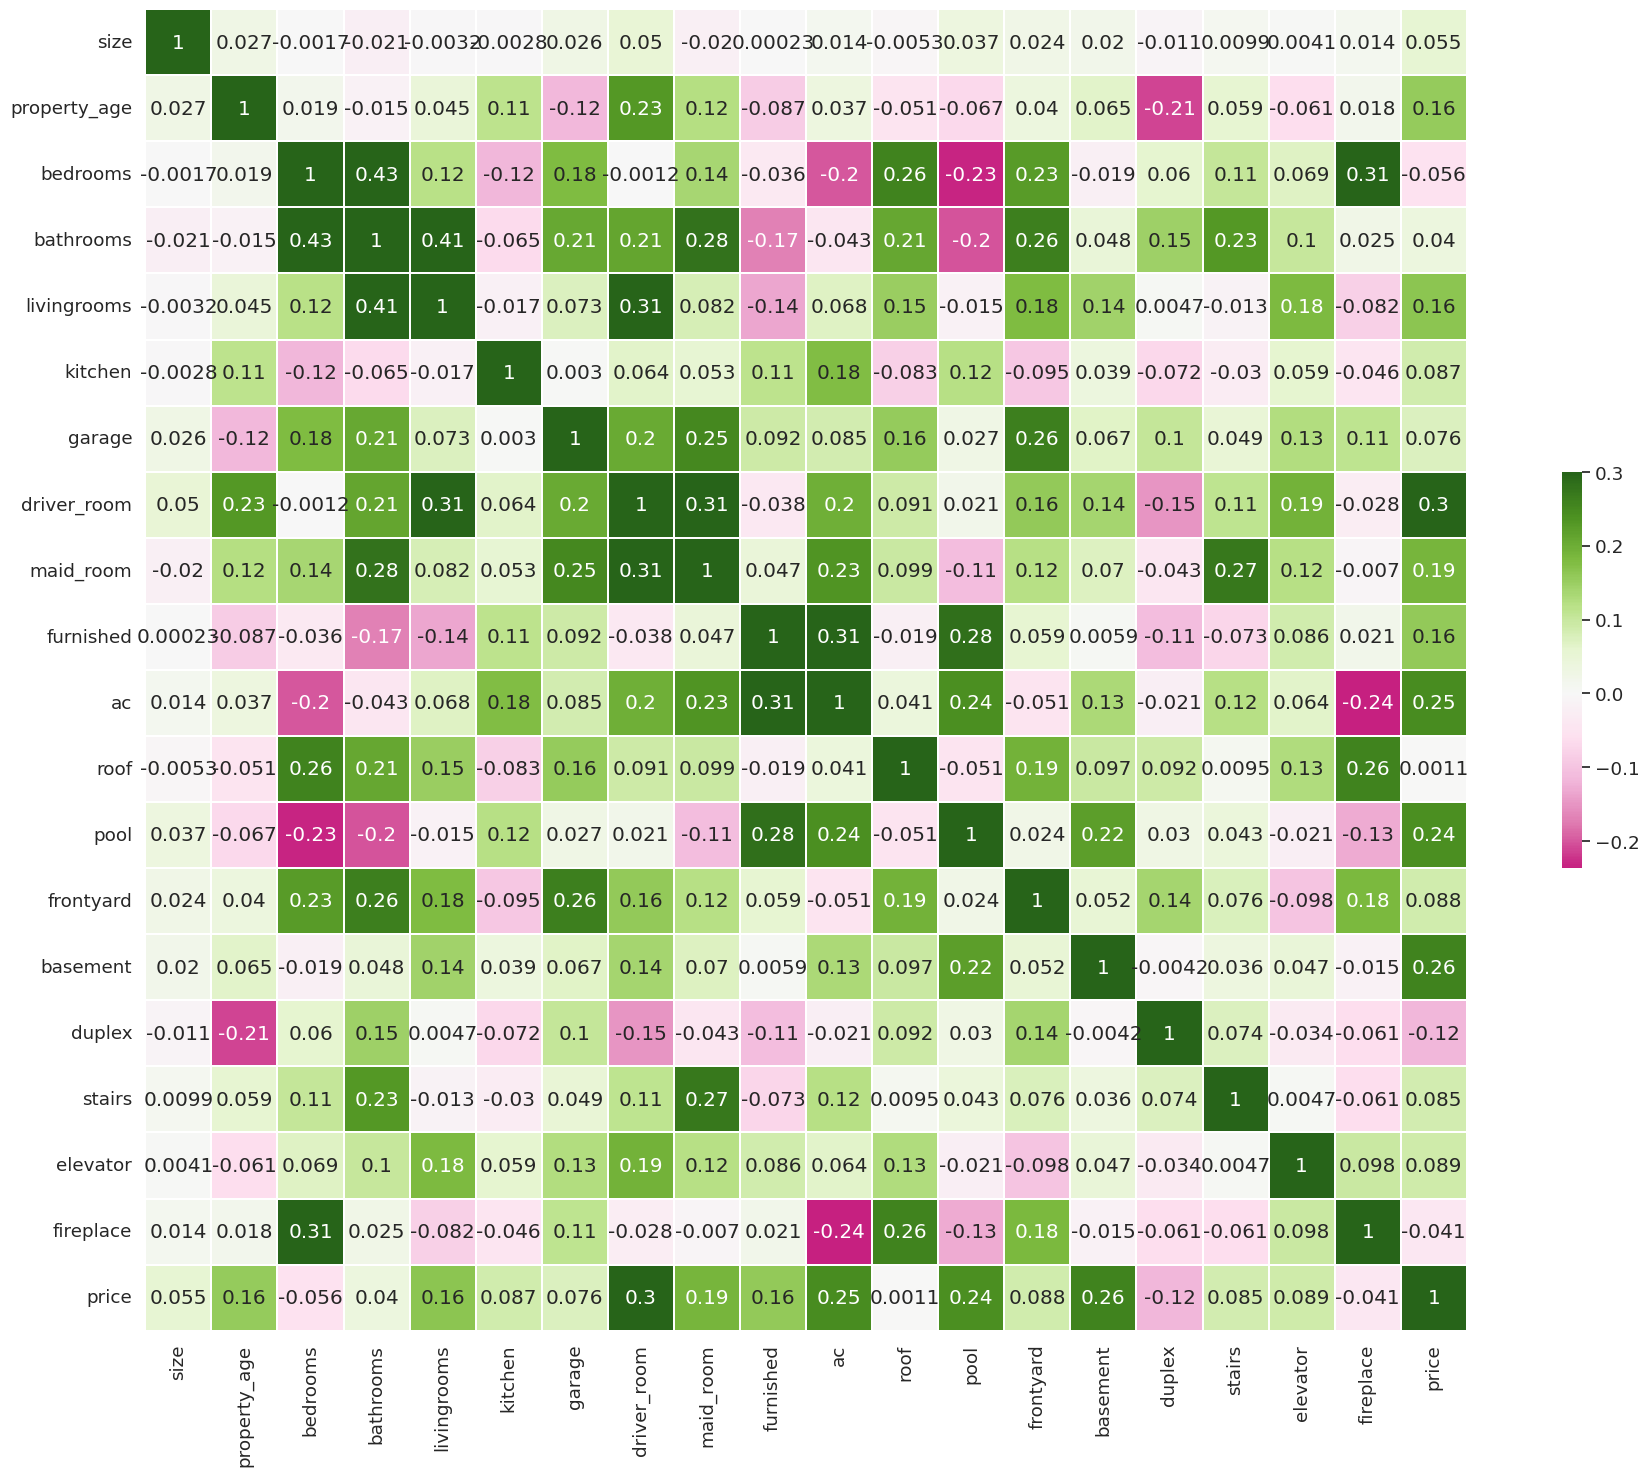

In [54]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmax=0.3, center=0, cmap="PiYG", square=True, linewidths=0.3, cbar_kws={"shrink": 0.3}, annot=True)
plt.tight_layout()
plt.show()

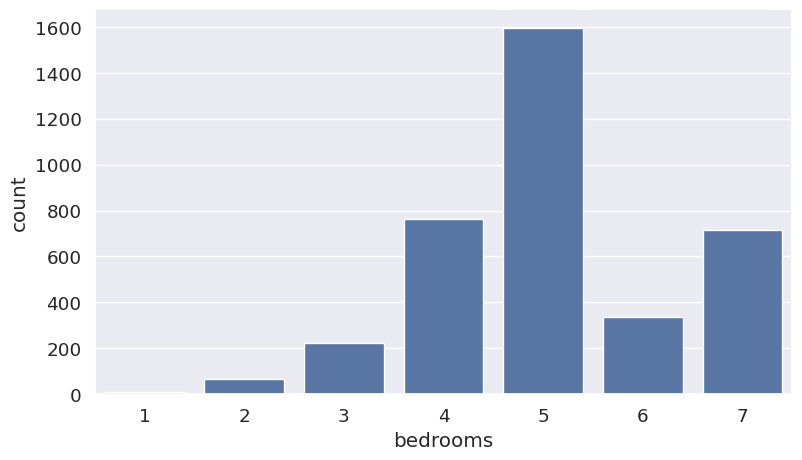

In [55]:
sns.set(rc={'figure.figsize': [12,6]}, font_scale=1.2)
sns.set(rc={'figure.figsize': [9,5]}, font_scale=1.2)
sns.countplot(data=df, x="bedrooms");

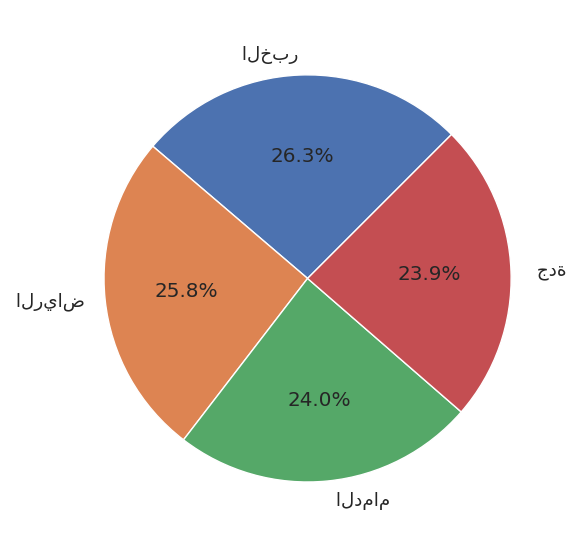

In [56]:
plt.figure(figsize=(6, 6))
payment_counts = df['city'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.tight_layout()
plt.show()

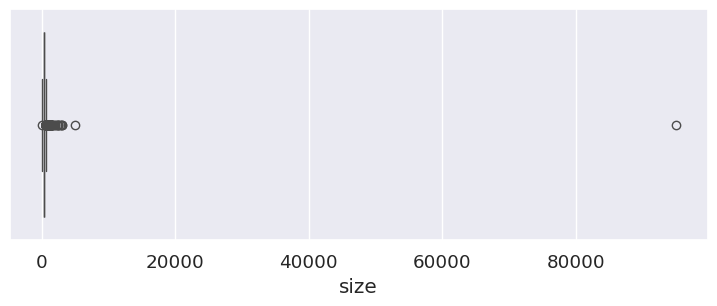

In [57]:
sns.set(rc={'figure.figsize': [9,3]}, font_scale=1.2)
sns.boxplot(data=df, x="size");

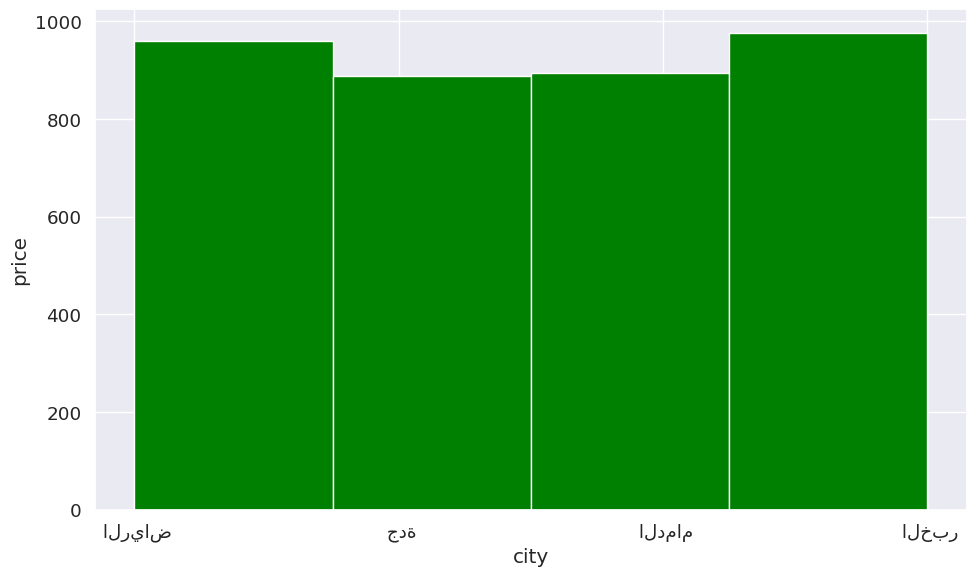

In [58]:

plt.figure(figsize=(10, 6))
plt.hist(df['city'], bins=4, color='green', edgecolor='white')
plt.xlabel('city')
plt.ylabel('price')
plt.tight_layout()
plt.show()

In [59]:
columns_to_drop = ['livingrooms', 'frontyard','bathrooms','front', 'details','maid_room','roof','ac','furnished','basement','duplex']
df = df.drop(columns=columns_to_drop)

In [60]:
df.rename(columns={'price': 'Prices'}, inplace=True)
df.head()

,city,district,size,property_age,bedrooms,kitchen,garage,driver_room,pool,stairs,elevator,fireplace,Prices
0,الرياض,حي العارض,250,0,5,1,1,0,0,1,0,0,80000
1,الرياض,حي القادسية,370,0,4,1,1,0,0,1,0,0,60000
2,الرياض,حي القادسية,380,0,4,1,1,1,0,1,0,0,60000
3,الرياض,حي المعيزلة,250,0,5,0,1,1,0,0,0,0,55000
4,الرياض,حي العليا,400,11,7,1,1,1,0,1,0,0,70000


<ipython-input-61-3d566a90439b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=0.3, center=0, cmap="PiYG", square=True, linewidths=0.3, cbar_kws={"shrink": 0.3}, annot=True)


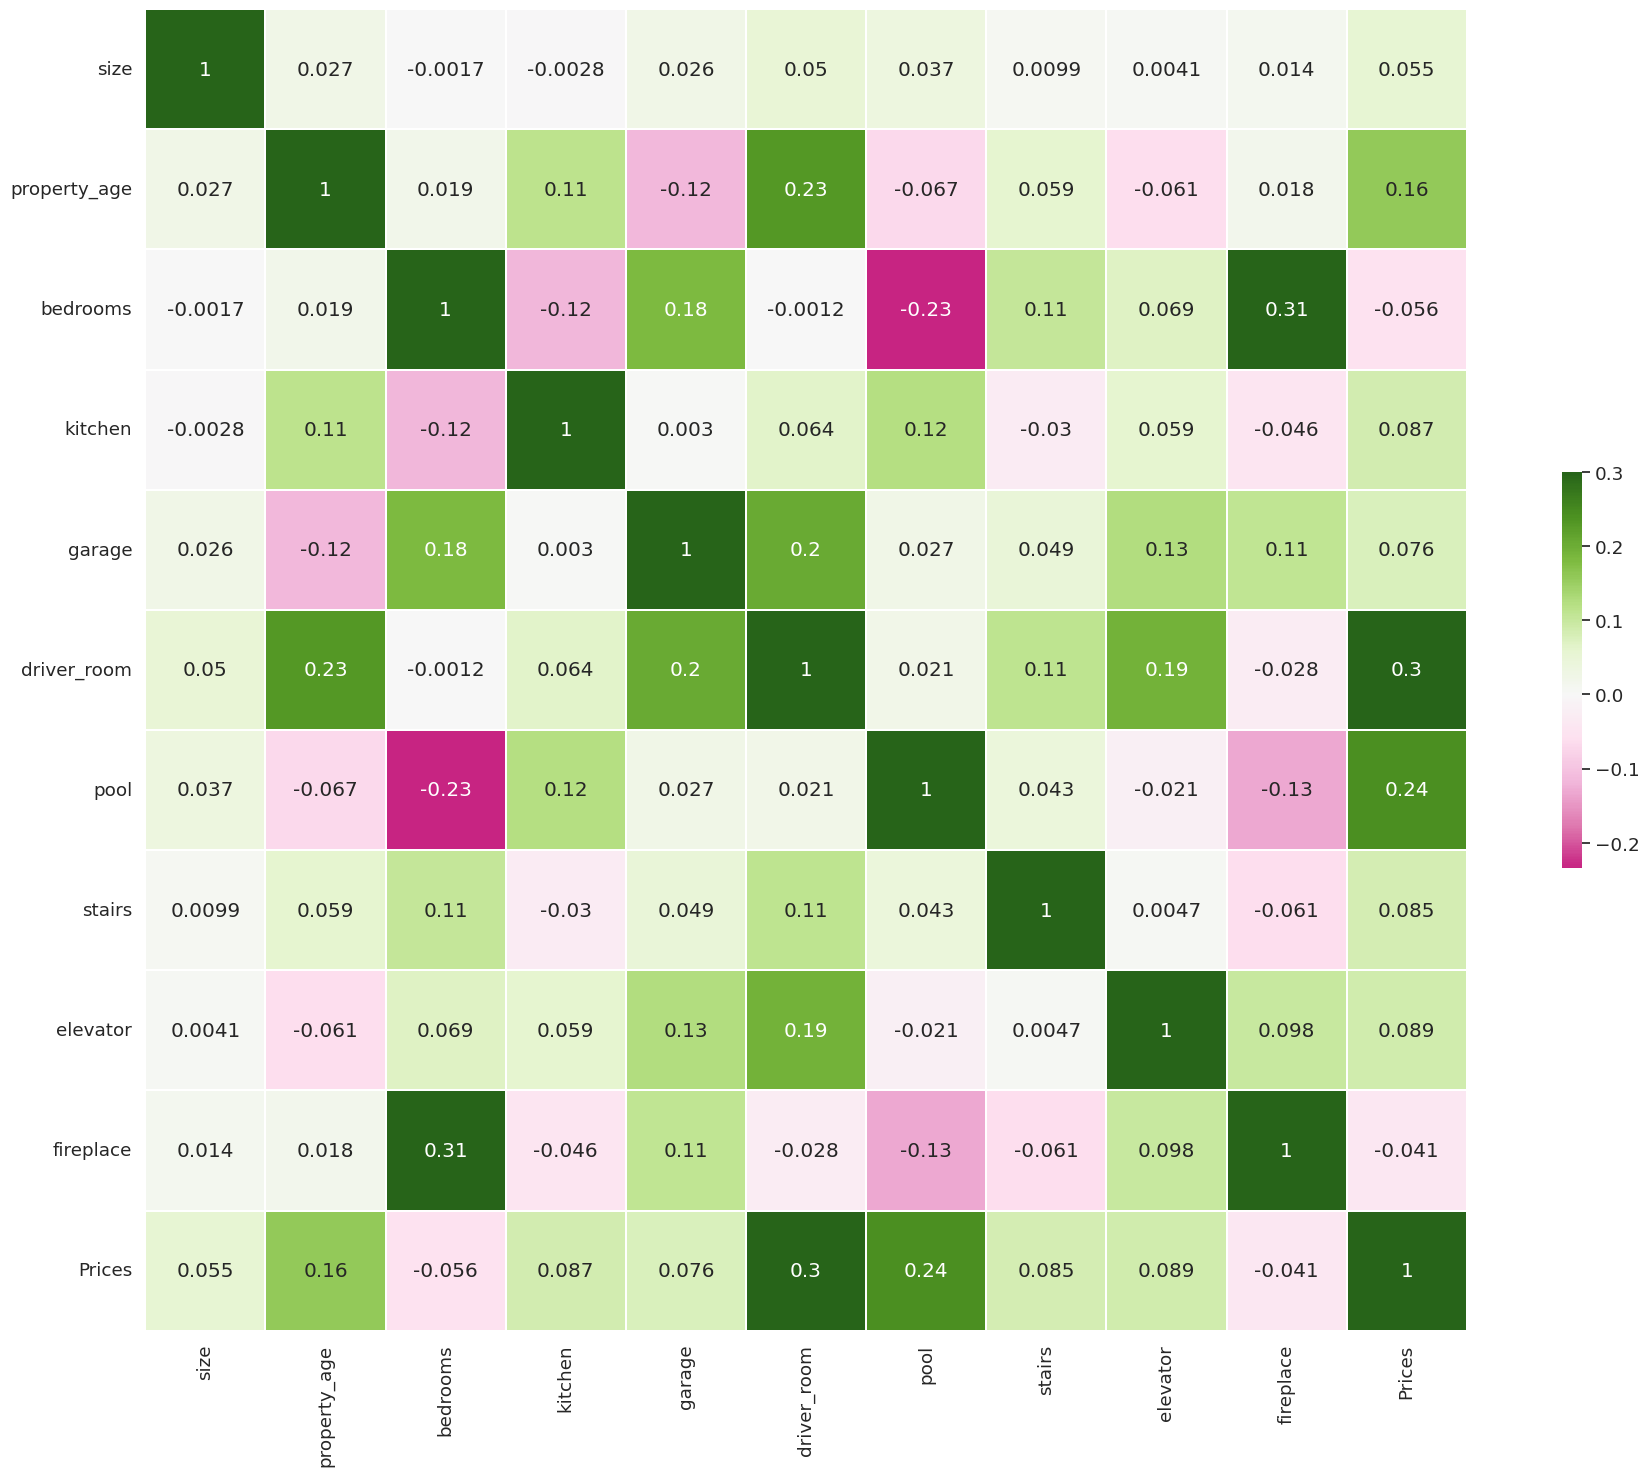

In [61]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmax=0.3, center=0, cmap="PiYG", square=True, linewidths=0.3, cbar_kws={"shrink": 0.3}, annot=True)
plt.tight_layout()
plt.show()

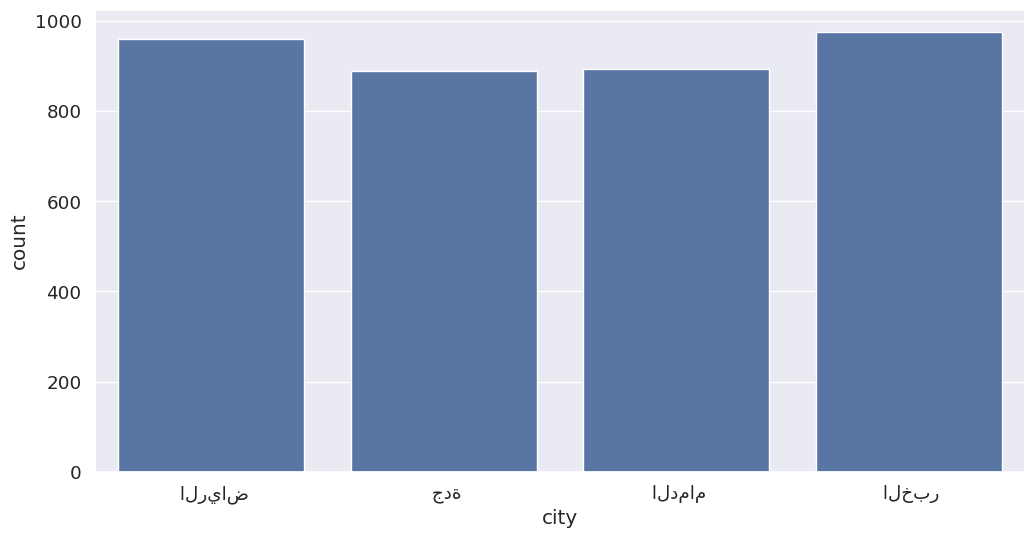

In [62]:
sns.set(rc={'figure.figsize': [12,6]}, font_scale=1.2)
sns.countplot(data=df, x="city");

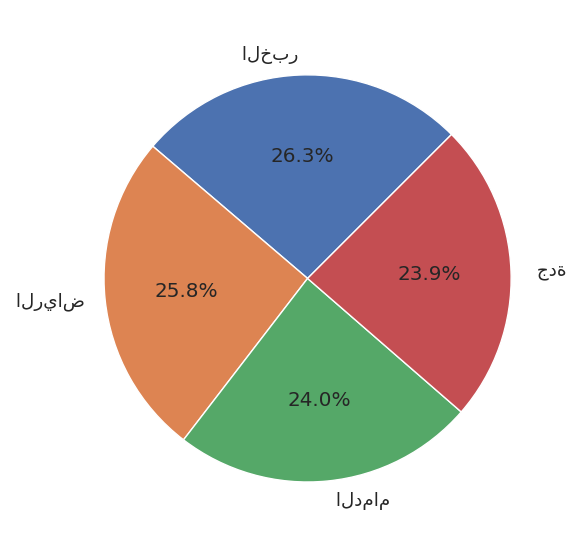

In [63]:
plt.figure(figsize=(6, 6))
payment_counts = df['city'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [64]:
df.isnull().sum()

city            0
district        0
size            0
property_age    0
bedrooms        0
kitchen         0
garage          0
driver_room     0
pool            0
stairs          0
elevator        0
fireplace       0
Prices          0
dtype: int64

In [65]:
df['Prices'].median()

70000.0

In [66]:
df['Prices'].max()

1700000

In [67]:
df['Prices'].min()

1000

In [68]:
df.head()

,city,district,size,property_age,bedrooms,kitchen,garage,driver_room,pool,stairs,elevator,fireplace,Prices
0,الرياض,حي العارض,250,0,5,1,1,0,0,1,0,0,80000
1,الرياض,حي القادسية,370,0,4,1,1,0,0,1,0,0,60000
2,الرياض,حي القادسية,380,0,4,1,1,1,0,1,0,0,60000
3,الرياض,حي المعيزلة,250,0,5,0,1,1,0,0,0,0,55000
4,الرياض,حي العليا,400,11,7,1,1,1,0,1,0,0,70000


In [69]:


bins = [999, 35000, 70000, 1700000]
labels = ['low','mid','high']

df['Prices'] = pd.cut(df['Prices'], bins=bins, labels=labels)



In [70]:
df.isnull().sum()

city            0
district        0
size            0
property_age    0
bedrooms        0
kitchen         0
garage          0
driver_room     0
pool            0
stairs          0
elevator        0
fireplace       0
Prices          0
dtype: int64

In [71]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['city']= label_encoder.fit_transform(df['city'])

df['city'].unique()

array([2, 3, 1, 0])

In [72]:
label_encoder = preprocessing.LabelEncoder()
df['district']= label_encoder.fit_transform(df['district'])
df['district'].unique()

array([ 79,  92, 109,  86,   7, 120,  30,  74, 149, 127, 124, 110, 140,
       121,  61,  85, 104,  44,  46, 158, 111, 125,  42, 161,  48, 163,
       137,  90, 131,  41,  94, 164, 115, 153, 116,  15,  72, 167,  81,
       130,  93, 114,  83, 135, 126, 108,  54, 142, 113,  99, 146,  12,
       106,  98,  39,  47,   3, 139,  37,  69,  23, 162, 117, 122, 136,
        20, 166,  82,  38, 134,  62, 123, 143, 160,  57,  25, 152,  56,
         0,  63, 144, 172,  75, 147, 128, 154, 132,  71, 156,  78, 173,
        36,  32, 168,  59, 155, 112,   8,  33,  45,  80, 165, 138, 102,
        89,  27, 119, 159,  52, 141,  16,  53, 148,  65,   2, 129,  73,
       118,  50,  76,   1, 103,  55,  60, 145,  43, 105, 171,  91,   6,
        95,  87,  10,  68,  49,  18,  51, 150,  31,  97,   9,  17,  22,
       170,  11, 157,  64,  70,  34,  88,   5, 101,  26,  67,  66,   4,
        13, 133, 107, 151,  28,  77,  40,  19,  14, 169,  96, 100,  24,
        58,  29,  84,  35,  21])

In [73]:

label_encoder = preprocessing.LabelEncoder()
df['Prices']= label_encoder.fit_transform(df['Prices'])
df['Prices'].unique()


array([0, 2, 1])

In [74]:
df.head()

,city,district,size,property_age,bedrooms,kitchen,garage,driver_room,pool,stairs,elevator,fireplace,Prices
0,2,79,250,0,5,1,1,0,0,1,0,0,0
1,2,92,370,0,4,1,1,0,0,1,0,0,2
2,2,92,380,0,4,1,1,1,0,1,0,0,2
3,2,109,250,0,5,0,1,1,0,0,0,0,2
4,2,86,400,11,7,1,1,1,0,1,0,0,2


In [75]:
df.shape

(3718, 13)

In [76]:
df['Prices'].value_counts()

0    1836
2    1633
1     249
Name: Prices, dtype: int64

In [77]:
df.dtypes

city            int64
district        int64
size            int64
property_age    int64
bedrooms        int64
kitchen         int64
garage          int64
driver_room     int64
pool            int64
stairs          int64
elevator        int64
fireplace       int64
Prices          int64
dtype: object

In [78]:
df['city'].unique()

array([2, 3, 1, 0])

In [79]:
df['district'].sum()

309355

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [81]:
X = df.drop('Prices', axis=1)
y = df['Prices']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [84]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [85]:
y_pred = rf.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8951612903225806


In [87]:
rf.score(X_test, y_test)

0.8951612903225806

In [88]:
model = xgb.XGBClassifier()

In [89]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [90]:
y_pred = model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9005376344086021


In [92]:
import joblib

joblib.dump(rf, "model.pkl")

['model.pkl']

In [93]:
df.head()

,city,district,size,property_age,bedrooms,kitchen,garage,driver_room,pool,stairs,elevator,fireplace,Prices
0,2,79,250,0,5,1,1,0,0,1,0,0,0
1,2,92,370,0,4,1,1,0,0,1,0,0,2
2,2,92,380,0,4,1,1,1,0,1,0,0,2
3,2,109,250,0,5,0,1,1,0,0,0,0,2
4,2,86,400,11,7,1,1,1,0,1,0,0,2
